In [1]:
import tespa
import numpy as np
import matplotlib.pyplot as plt

# Create a TesPa object
sim = tespa.TesPa()
# Tell the object where to load the EMSES files
sim.load_emses("../data/sub_fp_nomag_small", 0.0025, offset=False)

print(np.mean(sim.data.Ex))
# If B is constant it must we set manually as EMSES data does not write it
#sim.set_B(10e-6,dir="z")
#sim.set_E(-3e-3,dir="z", gradient=(1,0.0), gradient_extent=(0.3))

# Print some info about the simulation
print(sim)
Np = 200
r = 3.5e-6
qe = -1.6e-19

Lx = 0.8
Ly = 0.8
Lz = 0.8


dt0 = 1e-3 # Inital time step for the adaptive time step method

Loading data from  ../data/sub_fp_nomag_small
-7.093965e-12
Data loaded from ../data/sub_fp_nomag_small 
Dimensions in meters (x,y,z): (0.8, 0.8, 0.8) with dx = 0.0025


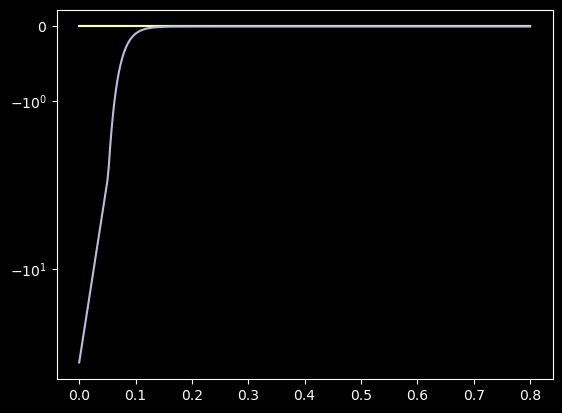

In [2]:
def potential_wall(x, lam=0.1, V0=-5.0):

    return V0 * np.exp(-x/lam)

lam = 0.02*Lx
V0 = -5e1

E = potential_wall(sim.data.x, lam=lam, V0=V0)
E_sym = E + -potential_wall(sim.data.x[::-1], lam=lam, V0=V0)



Ex = np.ones(sim.data.Ex.shape)
Ey = np.ones(sim.data.Ey.shape)
Ez = np.ones(sim.data.Ez.shape)
for i in range(len(sim.data.x)):
    
    Ex *= 0.0
    Ey *= 0.0
    #Ez *= 0.0
    #Ex[i,:,:] = E[i]
    #Ey[:,i,:] = E[i]
    Ez[:,:,i] = E[i]
    
    #Ez *= 1e-6

sim.set_E_arrays(Ex,Ey,Ez)

plt.plot(sim.data.x,sim.data.Ex[:,0,0])
plt.plot(sim.data.x,sim.data.Ey[0,:,0])
plt.plot(sim.data.x,sim.data.Ez[0,0,:])
plt.yscale('symlog')






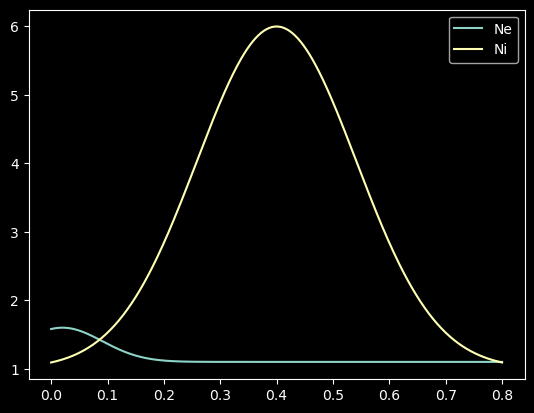

In [3]:
N_homogenous = np.ones(sim.data.Ex.shape)
Ne = N_homogenous.copy()*0.1
Ni = N_homogenous.copy()

density_profile_ze = np.exp(-((sim.data.z - 0.02)/0.1)**2)
density_profile_zi = 0.5* np.exp(-((sim.data.z - 0.4)/0.2)**2)
for i in range(len(sim.data.z)):
    Ne[:,:,i] += 1+ density_profile_ze[i]*0.5
    Ni[:,:,i] += density_profile_zi[i]*10

plt.plot(sim.data.z, Ne[0,0,:], label="Ne")
plt.plot(sim.data.z, Ni[0,0,:], label="Ni")
plt.legend()
sim.set_relative_density_arrays(Ne,Ni)



In [4]:
Np = 200
#ms = np.ones((Np))*r**3 # Particle mass
qs = np.ones((Np))*1e4*qe # Particle charge

v0s = np.zeros((3,Np)) # Initial speed in m/s
r_dust_array = np.linspace(1e-5,1e-3,Np)
ms = 1e-3*r_dust_array**3 # Particle mass
print("ms:", ms)
np.random.seed(1)
r0s = np.ones((3,Np))
for i in range(Np):
    # Initial position in m
    r0s[0,i] = 2*(np.random.rand()-0.5)*Lx*0.05 + 0.05*Lx #random position
    r0s[1,i] = 2*(np.random.rand()-0.5)*Ly*0.05 + 0.05*Ly #random position
    r0s[2,i] = 0.25  #z position

ms: [1.00000000e-18 3.35806859e-18 7.93984988e-18 1.54840940e-17
 2.67295513e-17 4.24149718e-17 6.32791057e-17 9.00607033e-17
 1.23498515e-16 1.64331290e-16 2.13297780e-16 2.71136734e-16
 3.38586902e-16 4.16387036e-16 5.05275884e-16 6.05992197e-16
 7.19274726e-16 8.45862220e-16 9.86493430e-16 1.14190711e-15
 1.31284200e-15 1.50003686e-15 1.70423043e-15 1.92616147e-15
 2.16656873e-15 2.42619096e-15 2.70576690e-15 3.00603531e-15
 3.32773494e-15 3.67160453e-15 4.03838284e-15 4.42880863e-15
 4.84362063e-15 5.28355759e-15 5.74935828e-15 6.24176144e-15
 6.76150581e-15 7.30933016e-15 7.88597322e-15 8.49217375e-15
 9.12867051e-15 9.79620223e-15 1.04955077e-14 1.12273256e-14
 1.19923947e-14 1.27914538e-14 1.36252417e-14 1.44944970e-14
 1.53999585e-14 1.63423650e-14 1.73224552e-14 1.83409679e-14
 1.93986418e-14 2.04962156e-14 2.16344282e-14 2.28140183e-14
 2.40357246e-14 2.53002859e-14 2.66084409e-14 2.79609284e-14
 2.93584870e-14 3.08018557e-14 3.22917731e-14 3.38289780e-14
 3.54142090e-14 3.70

In [5]:
Te = 1e5
Ti = 1e5
ne0 = 1e7
ni0 = 1e7

sim.run_dust(r0s,v0s,ms,qs,
             Te,Ti,ne0,ni0,
             aG=-1.62,
             Nt = 1e3, dt0=1e-2, rdust = 5e-4, dt_precompute=2e-8, precompute_charge=3000, 
             sub_boundary=(0.1,0.1,0.8),
             photoemission_current_density=0.0, recompute_charge=200,
             r_dust_array=r_dust_array)

Debye length:  6.900898070551797  m, kd =  0.14490867562111953
Running simulation for  1000  steps
Simulation box size:  0.1 0.1 0.8
Precomputing initial charge
Starting main simulation loop
Timestep  10  of  1000 
Timestep  20  of  1000 
Timestep  30  of  1000 
Timestep  40  of  1000 
Timestep  50  of  1000 
Timestep  60  of  1000 
Timestep  70  of  1000 
Timestep  80  of  1000 
Timestep  90  of  1000 
Timestep  100  of  1000 
Timestep  110  of  1000 
Timestep  120  of  1000 
Timestep  130  of  1000 
Timestep  140  of  1000 
Timestep  150  of  1000 
Timestep  160  of  1000 
Timestep  170  of  1000 
Timestep  180  of  1000 
Timestep  190  of  1000 
Timestep  200  of  1000 
Timestep  210  of  1000 
Timestep  220  of  1000 
Timestep  230  of  1000 
Timestep  240  of  1000 
Timestep  250  of  1000 
Timestep  260  of  1000 
Timestep  270  of  1000 
Timestep  280  of  1000 
Timestep  290  of  1000 
Timestep  300  of  1000 
Timestep  310  of  1000 
Timestep  320  of  1000 
Timestep  330  of 

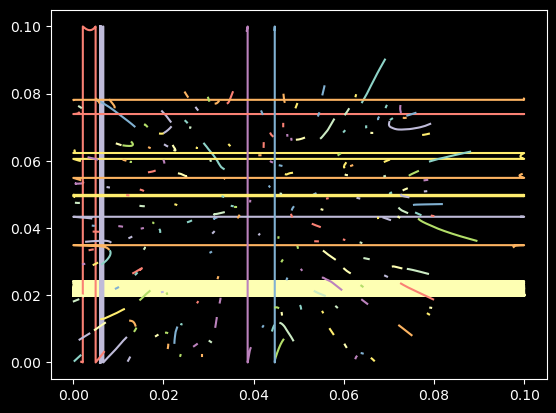

In [6]:

for i in range(Np):
    plt.plot(sim.r[0,i,:],sim.r[1,i,:]) 

0.2898576048339401


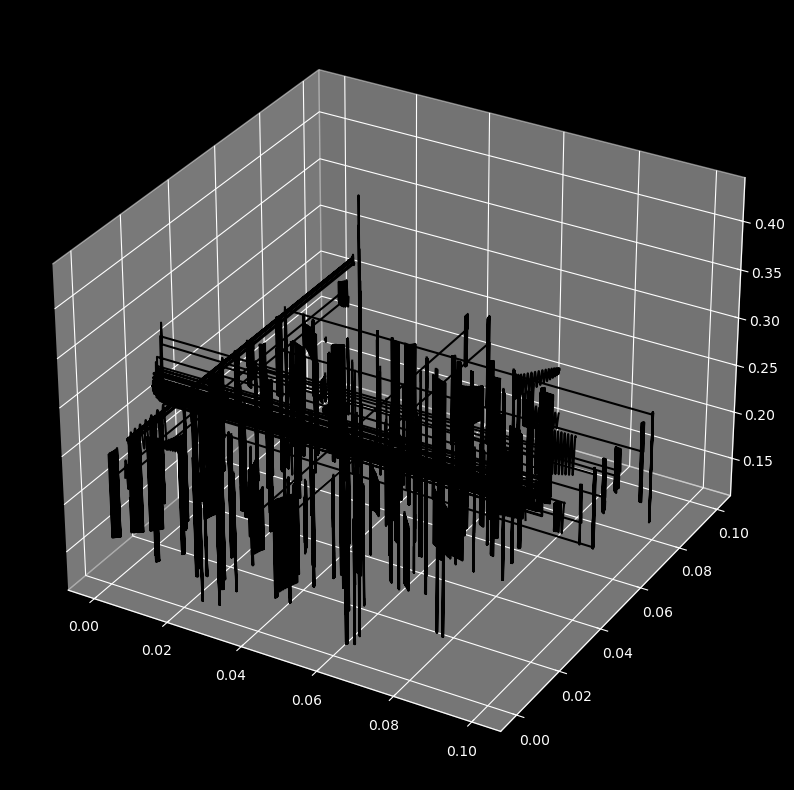

In [7]:


ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

for i in range(Np):

    ax.plot(sim.r[0,i,:],sim.r[1,i,:],sim.r[2,i,:], color = 'black')
print(sim.r[2,0,-1])
plt.show()

In [8]:
print(sim.Zd[:, -1])

[   -72439.02719902   -112073.57490382   -152905.96195544
   -194711.43020399   -237329.2163056    -280631.5233167
   -324547.41068726   -369015.51790051   -413956.44826648
   -459416.14978746   -503111.02293319   -542569.60801898
   -583115.96854498   -631560.85942236   -691928.11226967
   -760304.34187718   -818543.93526146   -849130.90315007
   -863690.51508207   -880671.01152257   -908750.75462239
   -951006.06316951  -1009411.49974889  -1085549.18261028
  -1178184.90080755  -1278729.06207921  -1360783.02608861
  -1396240.85200773  -1396446.25139845  -1385743.43019429
  -1382444.84891215  -1388308.79767506  -1406087.11243223
  -1434674.23291722  -1474386.75145795  -1525402.62967724
  -1587614.11033365  -1663325.64637145  -1751882.30485451
  -1853115.97570532  -1968710.16563401  -2093082.0220747
  -2216975.46986825  -2321883.84463697  -2386383.60630828
  -2404555.67567695  -2392724.6566558   -2366942.83604773
  -2340702.73435717  -2320806.35430505  -2306239.60071306
  -2299898.62889

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.colors import LinearSegmentedColormap

# Colormap: red for negative, black for zero, blue for positive
red_black_blue = LinearSegmentedColormap.from_list("red_black_blue", ["red", "black", "blue"])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

lim1 = 0#0.5*Lx - Lx*0.001
lim2 = 0.1#0.5*Ly + Ly*0.001

ax.set_xlim([lim1, lim2])
ax.set_ylim([lim1, lim2])
ax.set_zlim([0, 0.8])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

scatter = ax.scatter([], [], [], s=20, cmap=red_black_blue, c=[])

total_frames = sim.r.shape[2]
print("total frames", total_frames)
frame_step = total_frames // 50
frame_indices = np.arange(0, total_frames, frame_step)
Zd_max = np.max(np.abs(sim.Zd))
print("Zd max:", Zd_max)
phi_max = np.max(np.abs(sim.phi))
print("phi max:", phi_max)

def init():
    scatter._offsets3d = ([], [], [])
    scatter.set_array(np.array([]))
    return scatter,

def animate(i):
    frame = frame_indices[i]
    x_data = sim.r[0, :, frame]
    y_data = sim.r[1, :, frame]
    z_data = sim.r[2, :, frame]
    Zd_data = sim.Zd[:, frame]
    phi_data = sim.phi[:, frame]

    scatter._offsets3d = (x_data, y_data, z_data)
    scatter.set_array(phi_data)
    scatter.set_cmap(red_black_blue)
    scatter.set_clim(vmin=-phi_max, vmax=phi_max)
    ax.set_title(f'Timestep: {frame}')
    return scatter,

anim = FuncAnimation(
    fig, animate, init_func=init,
    frames=len(frame_indices), interval=50, blit=True
)
plt.close()
HTML(anim.to_jshtml())


total frames 1000
Zd max: 12452377.360248024
Qs max: 1.995090804433998e-12


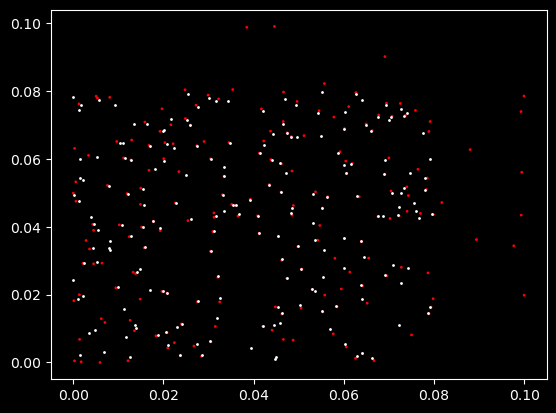

In [10]:
plt.scatter(sim.r[0,:,-1], sim.r[1,:,-1], c=sim.Zd[:,-1], cmap=red_black_blue, vmin=-1e3, vmax=1e3, s = 1)
plt.scatter(sim.r[0,:,0], sim.r[1,:,0], c='white', s=1)

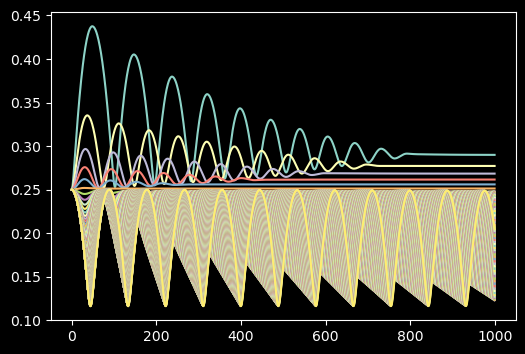

In [11]:
fig,ax = plt.subplots(figsize=(6,4))
for i in range(Np):
    ax.plot(sim.r[2,i,:])

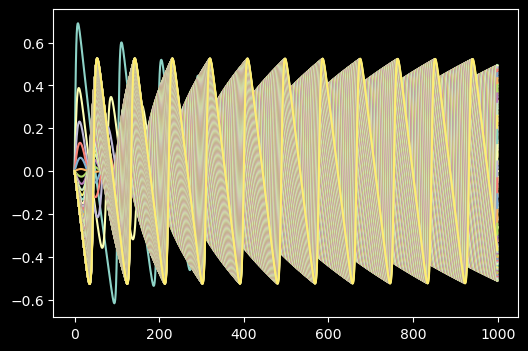

In [12]:
fig,ax = plt.subplots(figsize=(6,4))
for i in range(Np):
    ax.plot(sim.v[2,i,:])

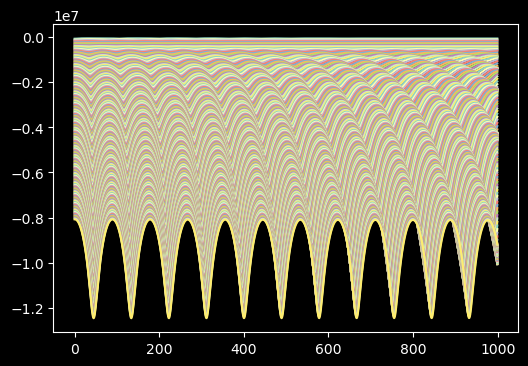

In [13]:
fig,ax = plt.subplots(figsize=(6,4))
for i in range(Np):
    ax.plot(sim.Zd[i,:])

# TODO

scale charge calculation according to particle size DONE

ion drag force